In [451]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [452]:
#loading the dataframe
#data cleaning for datatraining file

#Here we have got dataframe loaded for our datatraining dataset file

df_train = pd.read_csv('datatrain.txt')


**Data Cleaning Methodology**

**step 1** - Exploring the dataset and its values


In [453]:
#loading the first few rows of the dataset

df_train.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.180,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.150,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.150,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.150,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,NaN,27.2000,426.0,704.500000,0.004757,1
6,2015-02-04 17:55:59,0.000,27.2000,419.0,701.000000,0.004757,1
7,2015-02-04 17:57:00,23.100,27.2000,419.0,701.666667,0.004757,1
8,2015-02-04 17:57:59,23.100,27.2000,419.0,699.000000,0.004757,1
9,2015-02-04 17:58:59,0.000,27.2000,419.0,689.333333,0.004757,1
10,2015-02-04 18:00:00,23.075,27.1750,419.0,688.000000,0.004745,1


In [454]:
#checking if any null values are there there in the dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8150 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8150 non-null   object 
 1   Temperature    8146 non-null   float64
 2   Humidity       8144 non-null   float64
 3   Light          8150 non-null   float64
 4   CO2            8150 non-null   float64
 5   HumidityRatio  8150 non-null   float64
 6   Occupancy      8150 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 509.4+ KB


In [455]:
print(df_train.shape)

(8150, 7)


In [456]:
df_train = df_train.dropna(axis=0)

In [457]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8140 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8140 non-null   object 
 1   Temperature    8140 non-null   float64
 2   Humidity       8140 non-null   float64
 3   Light          8140 non-null   float64
 4   CO2            8140 non-null   float64
 5   HumidityRatio  8140 non-null   float64
 6   Occupancy      8140 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.8+ KB


**Data Cleaning Methodology**


**step 2**

Checking for null values in the dataset and cleaning them.


In [458]:
#finding the null values in the dataset
#in the output we can see that there are null values in the humidity column

df_train.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [459]:
# df_train = df_train[df_train['Humidity'] != 0.0]
# df_train.shape

In [461]:
df_train.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

**Data Cleaning Methodology**

**Step 3** - Identifying Duplicate values and removing them as they're of no use to our process.

In [462]:
duplicate_train = df_train[df_train.duplicated()]
print("Number of duplicate rows in the dataset: ",len(duplicate_train))
df_train = df_train.drop_duplicates()


#removed all the duplicate columns

Number of duplicate rows in the dataset:  7


**Data Cleaning Methodology**

**Step 4** - Identifying 0 values in the dataset

In [463]:
df_train.duplicated().sum()

0

In [464]:
zero_values = (df_train == 0.00).sum()
print(zero_values)
print(df_train.shape)

date                0
Temperature        15
Humidity           16
Light            5152
CO2                 4
HumidityRatio       0
Occupancy        6406
dtype: int64
(8133, 7)


In [465]:
# Replacing the co2 values having 0 to median values

co2_median = df_train[df_train['CO2'] != 0]['CO2'].median()
df_train['CO2'].replace(0, co2_median, inplace=True)

print(df_train.shape)
#co2 with zero values is replaced with median of the values

(8133, 7)


In [466]:
zero_values = (df_train == 0.00).sum()
print(zero_values)
print(df_train.shape)

date                0
Temperature        15
Humidity           16
Light            5152
CO2                 0
HumidityRatio       0
Occupancy        6406
dtype: int64
(8133, 7)


**Data Cleaning Methodology**

**Step 5** - Changing the format of the column names to Sentence case manner


In [467]:
df_train.columns = df_train.columns.str.capitalize()
print(df_train)

print(df_train.shape)

                     Date  Temperature  Humidity  Light         Co2  \
1     2015-02-04 17:51:00        23.18   27.2720  426.0  721.250000   
2     2015-02-04 17:51:59        23.15   27.2675  429.5  714.000000   
3     2015-02-04 17:53:00        23.15   27.2450  426.0  713.500000   
4     2015-02-04 17:54:00        23.15   27.2000  426.0  708.250000   
6     2015-02-04 17:55:59         0.00   27.2000  419.0  701.000000   
...                   ...          ...       ...    ...         ...   
8139  2015-02-10 09:29:00        21.05   36.0975  433.0  787.250000   
8140  2015-02-10 09:29:59        21.05   35.9950  433.0  789.500000   
8141  2015-02-10 09:30:59        21.10   36.0950  433.0  798.500000   
8142  2015-02-10 09:32:00        21.10   36.2600  433.0  820.333333   
8143  2015-02-10 09:33:00        21.10   36.2000  447.0  821.000000   

      Humidityratio  Occupancy  
1          0.004793          1  
2          0.004783          1  
3          0.004779          1  
4          0.00

**Data Cleaning Methodology**

**Step 6** - Changing the date time format

In [468]:
dates = df_train["Date"]

def change_string_into_datetimeformat(x):
  return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

converted_dates = dates.apply(change_string_into_datetimeformat)

df_train["Date"] = converted_dates

In [469]:
print(df_train.shape)

(8133, 7)


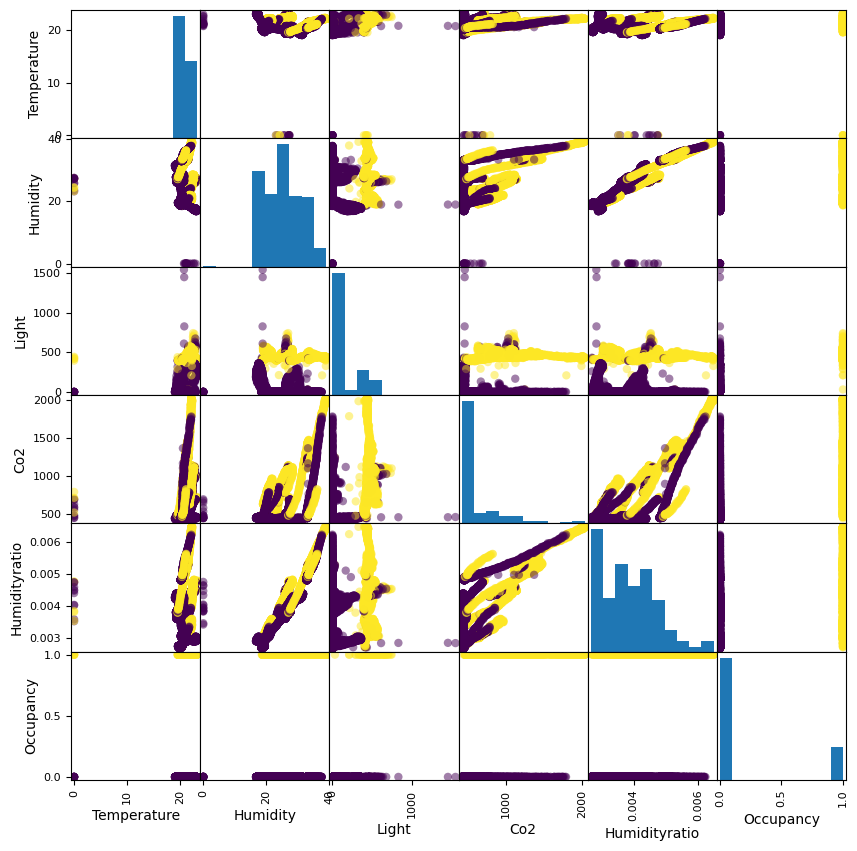

In [470]:
# EDA step 1


pd.plotting.scatter_matrix(df_train,figsize=(10,10),grid=True, marker= 'o', c= df_train["Occupancy"])
plt.show()

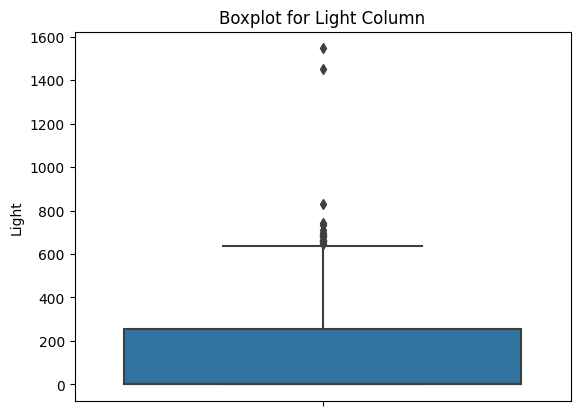

In [471]:
# EDA step 2

sea.boxplot(data=df_train, y='Light')
plt.title('Boxplot for Light Column')
plt.show()

**Data Cleaning Methodology**

**Step 7** - Identifying outliers


In [472]:
Q1 = df_train['Light'].quantile(0.25)
Q3 = df_train['Light'].quantile(0.75)
IQR= Q3-Q1


# Define a threshold for outliers (e.g., 1.5 times IQR)
threshold = 1.5
upper_bound=Q3 + threshold * IQR
# Identify outliers
outliers = df_train[(df_train['Light'] >upper_bound )]
print(outliers)

df_train = df_train[~(df_train['Light'] > Q3 + threshold * IQR)]
df_train.shape

                    Date  Temperature   Humidity        Light          Co2  \
1107 2015-02-05 12:16:59    22.390000  26.790000   696.500000  1078.000000   
1108 2015-02-05 12:17:59    22.390000  26.972500   657.250000  1086.000000   
1109 2015-02-05 12:19:00    22.426667  27.000000   744.000000  1098.333333   
1110 2015-02-05 12:20:00    22.472500  26.890000   708.750000  1099.000000   
1112 2015-02-05 12:22:00    22.575000  26.840000   660.000000  1093.500000   
1113 2015-02-05 12:23:00    22.600000  26.790000   688.500000  1100.500000   
1115 2015-02-05 12:24:59    22.600000  26.856667   661.333333  1105.000000   
1116 2015-02-05 12:26:00    22.675000  26.890000   665.500000  1111.250000   
1117 2015-02-05 12:27:00    22.666667  26.963333   647.666667  1108.333333   
1144 2015-02-05 12:53:59    22.675000  26.525000   732.750000  1038.500000   
1145 2015-02-05 12:55:00    22.722500  26.472500   686.250000  1027.000000   
1147 2015-02-05 12:56:59    22.856667  26.323333   676.000000  1

(8118, 7)

In [473]:
print(df_train.shape)

(8118, 7)


**Data Cleaning Methodology**

**Step 8** - Standardising the precision of the values in the columns

In [474]:
df_train['Light'] = df_train['Light'].round(3)

In [475]:
df_train

,Date,Temperature,Humidity,Light,Co2,Humidityratio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
6,2015-02-04 17:55:59,0.00,27.2000,419.0,701.000000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


**Data Cleaning Methodology**

**Step 9** - Normalization the values in the dataset

In [476]:
df_2= df_train.drop(columns=['Date'])
df_2 = (df_2 - df_2.min()) / (df_2.max() - df_2.min())

In [477]:
df_2['Date']=df_train['Date']

In [478]:
df_2 = df_2[['Date','Temperature','Humidity','Light','Co2','Humidityratio','Occupancy']]

In [479]:
df_2

,Date,Temperature,Humidity,Light,Co2,Humidityratio,Occupancy
1,2015-02-04 17:51:00,1.000000,0.697182,0.667712,0.190933,0.557318,1.0
2,2015-02-04 17:51:59,0.998706,0.697067,0.673197,0.186446,0.554807,1.0
3,2015-02-04 17:53:00,0.998706,0.696491,0.667712,0.186136,0.553761,1.0
4,2015-02-04 17:54:00,0.998706,0.695341,0.667712,0.182887,0.551669,1.0
6,2015-02-04 17:55:59,0.000000,0.695341,0.656740,0.178400,0.547851,1.0
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,0.908110,0.922797,0.678683,0.231781,0.763986,1.0
8140,2015-02-10 09:29:59,0.908110,0.920176,0.678683,0.233173,0.759782,1.0
8141,2015-02-10 09:30:59,0.910267,0.922733,0.678683,0.238744,0.768438,1.0
8142,2015-02-10 09:32:00,0.910267,0.926951,0.678683,0.252256,0.775226,1.0


**Exploratory Data Analysis**

Exploring data analysis of the dataset

In [480]:
#EDA step 3 - printing the statistics of the whole dataframe

df_2.describe()

,Temperature,Humidity,Light,Co2,Humidityratio,Occupancy
count,8118.000000,8118.000000,8118.000000,8118.000000,8118.000000,8118.000000
mean,0.887603,0.656562,0.185421,0.119622,0.312384,0.211382
std,0.058027,0.144532,0.301505,0.194473,0.224329,0.408314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.849871,0.514689,0.000000,0.016246,0.106129,0.000000
50%,0.879638,0.669943,0.000000,0.025220,0.296213,0.000000
75%,0.921700,0.780874,0.393613,0.138597,0.440712,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


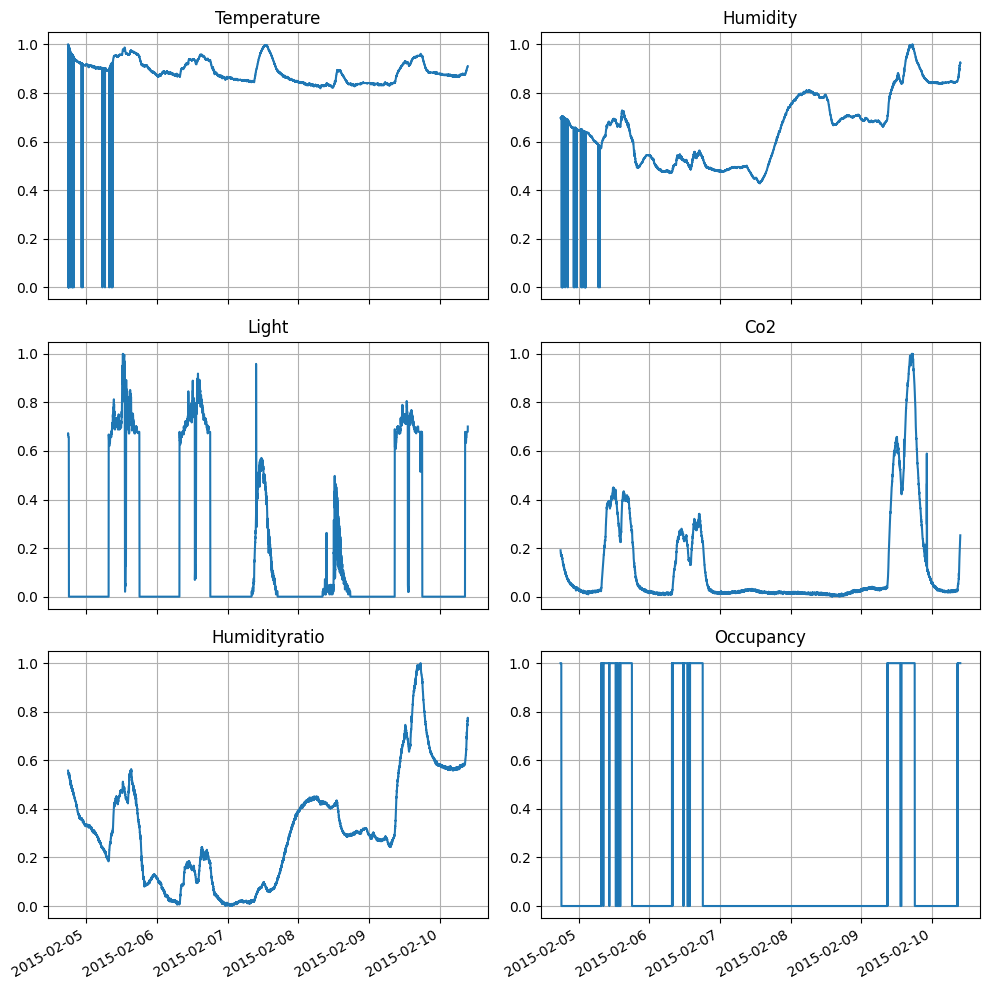

In [481]:
# EDA step 4

df_2['Date'] = pd.to_datetime(df_2['Date'])

for i, col in enumerate(df_2.columns.values[1:]):
    plt.subplot(3, 2, i+1)

    dates = mdates.date2num(df_2['Date'])
    plt.plot(dates, df_2[col].values.tolist(), label=col)

    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    ax.xaxis_date()
    fig.autofmt_xdate()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
    plt.grid(True)
plt.show()

In [482]:
# EDA step 5

correlation_matrix = df_2.corr()

# Print the correlation matrix
print(correlation_matrix)

               Temperature  Humidity     Light       Co2  Humidityratio  \
Temperature       1.000000 -0.112635  0.488373  0.422168       0.099651   
Humidity         -0.112635  1.000000  0.044715  0.432913       0.933593   
Light             0.488373  0.044715  1.000000  0.668683       0.232571   
Co2               0.422168  0.432913  0.668683  1.000000       0.626163   
Humidityratio     0.099651  0.933593  0.232571  0.626163       1.000000   
Occupancy         0.395398  0.134343  0.915547  0.711444       0.298696   

               Occupancy  
Temperature     0.395398  
Humidity        0.134343  
Light           0.915547  
Co2             0.711444  
Humidityratio   0.298696  
Occupancy       1.000000  


<ipython-input-482-78cef3b5ed7c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_2.corr()


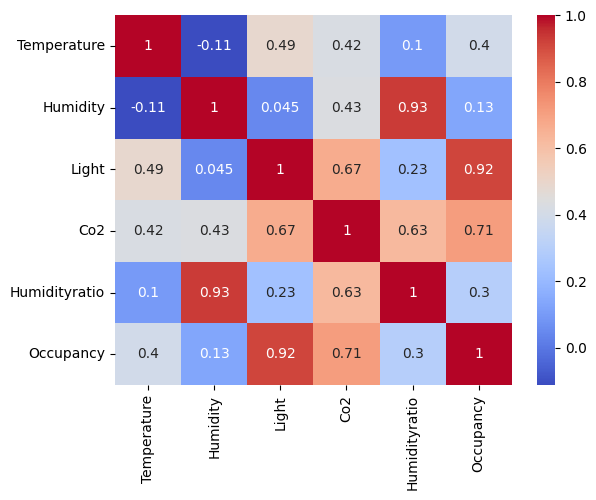

In [483]:
#EDA step 5

sea.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

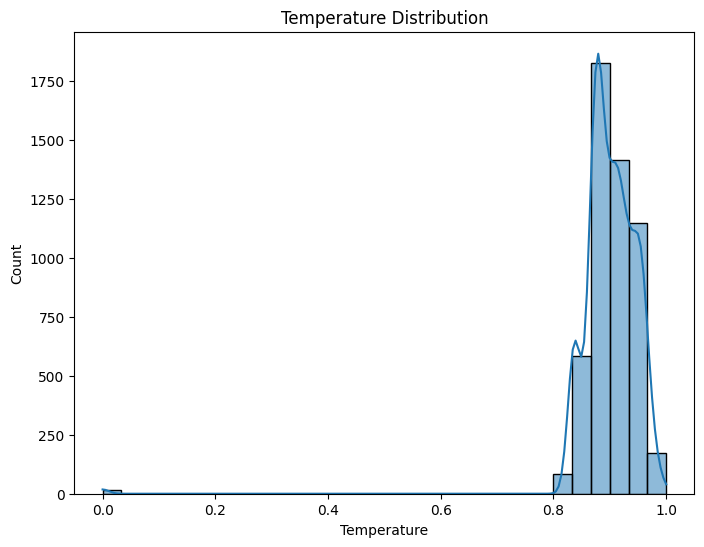

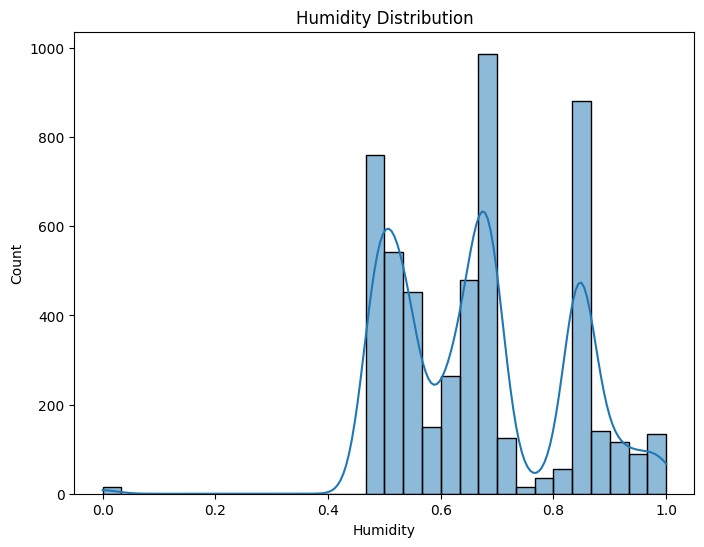

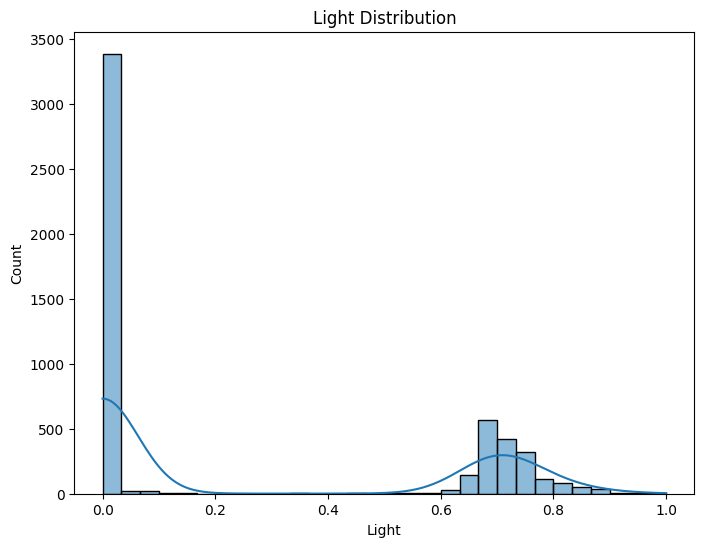

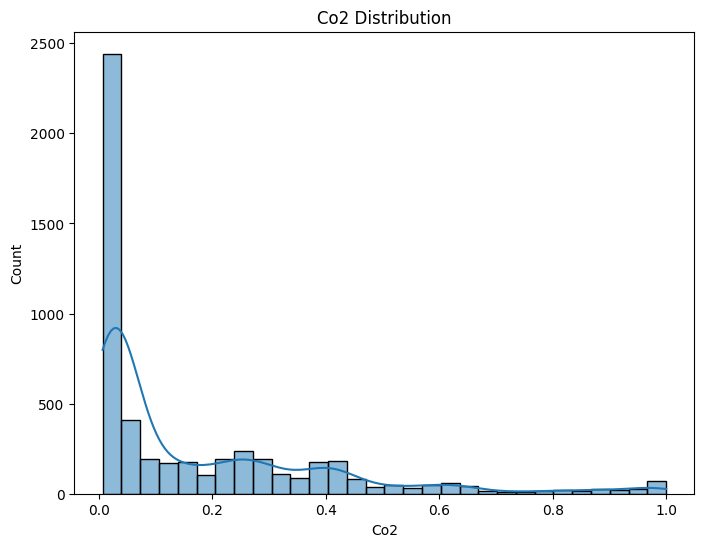

In [493]:
#EDA step 6

plt.figure(figsize=(8, 6))
sea.histplot(df_2['Temperature'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.show()

#EDA step 6

plt.figure(figsize=(8, 6))
sea.histplot(df_2['Humidity'], bins=30, kde=True)
plt.title('Humidity Distribution')
plt.show()

#EDA step 6

plt.figure(figsize=(8, 6))
sea.histplot(df_2['Light'], bins=30, kde=True)
plt.title('Light Distribution')
plt.show()

#EDA step 6

plt.figure(figsize=(8, 6))
sea.histplot(df_2['Co2'], bins=30, kde=True)
plt.title('Co2 Distribution')
plt.show()


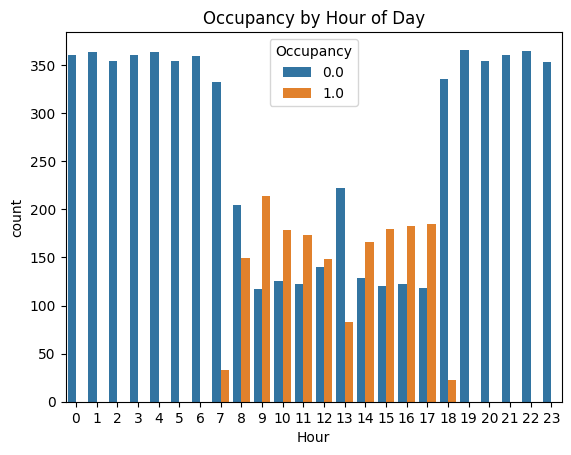

In [486]:
#EDA step 7

df_2['Hour'] = df_2['Date'].dt.hour
sea.countplot(data=df_2, x='Hour', hue='Occupancy')
plt.title('Occupancy by Hour of Day')
plt.show()

In [488]:
#data cleaning step 10

days = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]
date1 = datetime.strptime('2015-02-07', '%Y-%m-%d')
print("Day on 7th February is ", days[date1.weekday()])

date2 = datetime.strptime('2015-02-08', '%Y-%m-%d')
print("Day on 8th February is ",days[date2.weekday()])

Day on 7th February is  Saturday
Day on 8th February is  Sunday


In [489]:
#data cleaning step 10



weekends = ['2015-02-07', '2015-02-08']

# Convert the string dates to datetime.date format
weekends = [pd.to_datetime(date).date() for date in weekends]

# Filter the DataFrame to exclude rows with the given dates
df_2 = df_2[~df_2['Date'].dt.date.isin(weekends)]

df_2['Date'].dt.date.unique()



array([datetime.date(2015, 2, 4), datetime.date(2015, 2, 5),
       datetime.date(2015, 2, 6), datetime.date(2015, 2, 9),
       datetime.date(2015, 2, 10)], dtype=object)

In [490]:
#EDA step 8

from scipy.stats import zscore
features = ['Temperature', 'Humidity', 'Light', 'Co2', 'Humidityratio']
z_scores = np.abs(zscore(df_2[features]))
outliers = (z_scores > 3).sum(axis=1)
df_outliers = df_2[outliers > 0]
print(df_outliers)

                    Date  Temperature  Humidity     Light       Co2  \
6    2015-02-04 17:55:59     0.000000  0.695341  0.656740  0.178400   
9    2015-02-04 17:58:59     0.000000  0.695341  0.656740  0.171180   
17   2015-02-04 18:07:00     0.000000  0.695341  0.000000  0.166331   
23   2015-02-04 18:13:00     0.000000  0.701604  0.000000  0.172211   
25   2015-02-04 18:15:00     0.987489  0.000000  0.000000  0.171283   
...                  ...          ...       ...       ...       ...   
7211 2015-02-09 18:01:00     0.953408  0.968876  0.667712  0.860591   
7212 2015-02-09 18:02:00     0.953408  0.966767  0.667712  0.859663   
7213 2015-02-09 18:03:00     0.951970  0.965297  0.664055  0.856517   
7214 2015-02-09 18:04:00     0.953408  0.966064  0.328370  0.851462   
7215 2015-02-09 18:04:59     0.953408  0.963507  0.000000  0.848987   

      Humidityratio  Occupancy  Hour  
6          0.547851        1.0    17  
9          0.547851        1.0    17  
17         0.540245        0.0

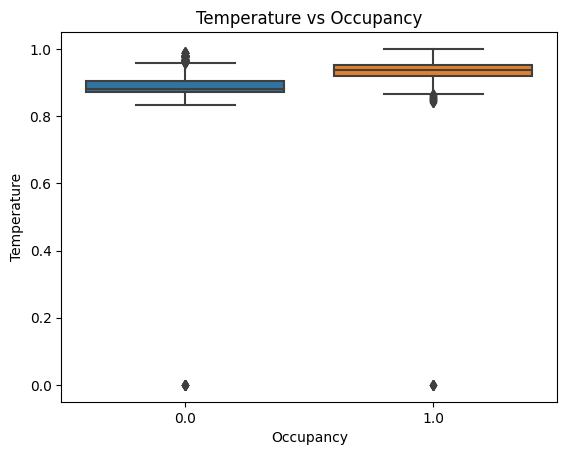

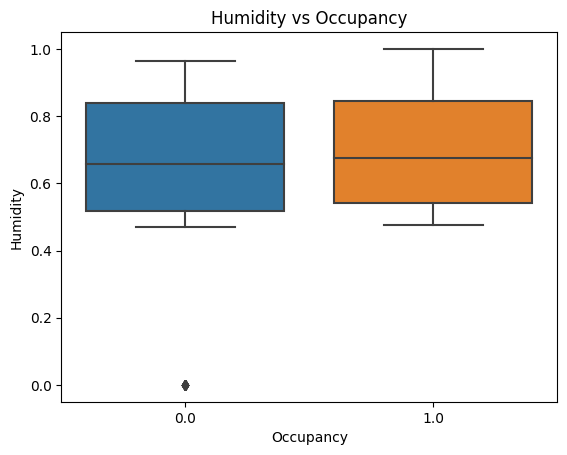

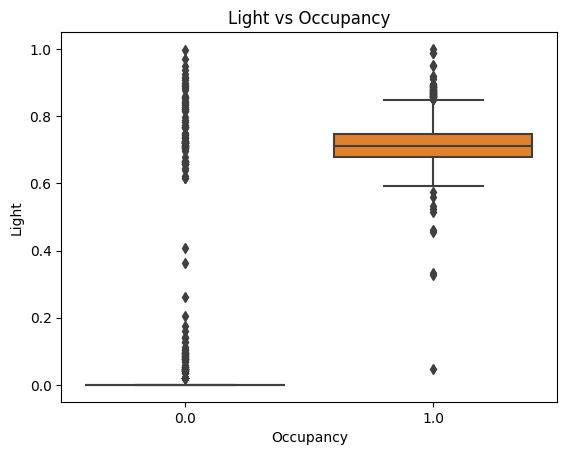

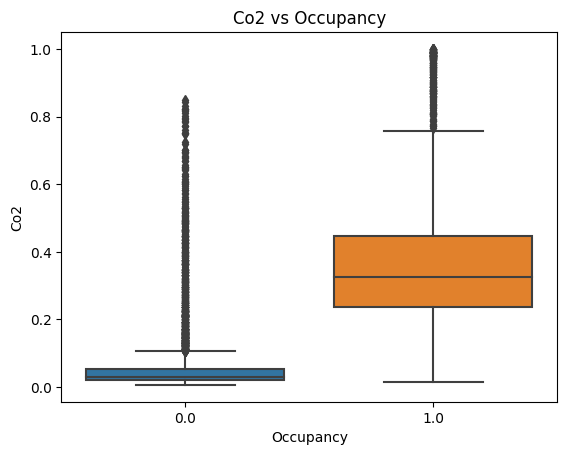

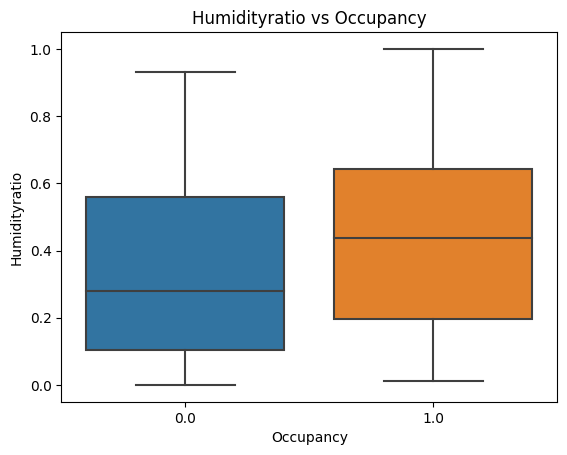

In [491]:
#EDA step 9

features = ['Temperature', 'Humidity', 'Light', 'Co2', 'Humidityratio']
for feature in features:
    sea.boxplot(x=df_2['Occupancy'], y=df_2[feature])
    plt.title(f'{feature} vs Occupancy')
    plt.show()

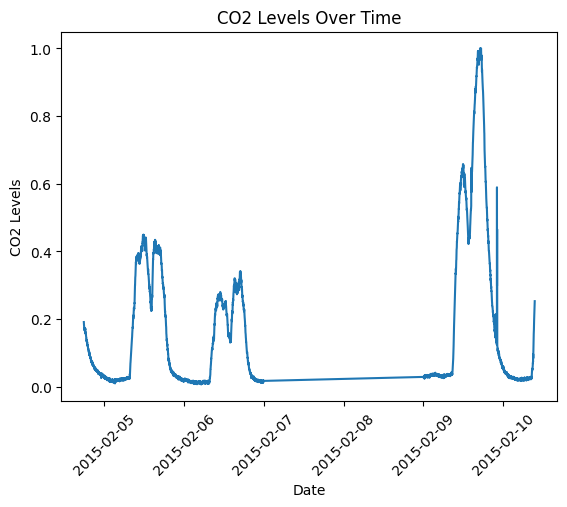

In [492]:
#EDA Step 10

plt.plot(df_2['Date'], df_2['Co2'])
plt.title('CO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.xticks(rotation=45)
plt.show()